<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/czyzewska/03_19_Regresja_SalaryData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regresja

Aneta Czyżewska

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import median_absolute_error


In [2]:
df = pd.read_csv('Salary_Data.csv', sep=',')
df.head(7)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [4]:
le = LabelEncoder()

In [5]:
cols = ['Gender',	'Education Level','Job Title']

In [6]:
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [7]:
df.head(4)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               375 non-null    int64  
 2   Education Level      375 non-null    int64  
 3   Job Title            375 non-null    int64  
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 17.7 KB


In [9]:
# Podział danych na zbiór treningowy (70%) i testowy (30%)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)


In [10]:
#zmienić wszystko na 0/1
# y = Salary

In [11]:
# Wyświetlenie rozmiaru zbiorów
print("Rozmiar zbioru treningowego:", train_df.shape)
print("Rozmiar zbioru testowego:", test_df.shape)

Rozmiar zbioru treningowego: (262, 6)
Rozmiar zbioru testowego: (113, 6)


In [28]:
X = train_df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
Y = train_df['Salary']
x = test_df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = test_df['Salary']

In [18]:
print(X.isna().sum())

Age                    1
Gender                 0
Education Level        0
Job Title              0
Years of Experience    1
dtype: int64


In [21]:
print(Y.isna().sum())

1


In [34]:
X.dropna(inplace=True)
Y.dropna(inplace = True)
x.dropna(inplace=True)
y.dropna(inplace = True)

<ipython-input-34-ed24e7aa2d34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
<ipython-input-34-ed24e7aa2d34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.dropna(inplace=True)


In [23]:
reg = LinearRegression().fit(X, Y)

In [25]:
reg.score(X, Y)
#Return the coefficient of determination of the prediction.

0.9040128063195576

In [26]:
reg.coef_

array([ 3167.49320076,  7044.63269168, 15344.52678738,    31.09155926,
        2500.08278263])

In [31]:
x

,Age,Gender,Education Level,Job Title,Years of Experience
167,46.0,1,2,147,18.0
33,39.0,0,0,84,10.0
15,44.0,1,0,89,16.0
316,34.0,0,1,117,6.0
57,43.0,1,2,116,17.0
...,...,...,...,...,...
305,36.0,1,0,110,8.0
244,34.0,0,0,62,6.0
272,37.0,1,0,118,8.0
173,43.0,1,0,144,16.0


In [32]:
y

167    150000.0
33      65000.0
15     125000.0
316     80000.0
57     140000.0
         ...   
305     95000.0
244     70000.0
272     90000.0
173    140000.0
351     55000.0
Name: Salary, Length: 113, dtype: float64

In [37]:
# Make predictions using the testing set
y_pred = reg.predict(x)
print(y_pred)

[174823.68045187  92958.11128544 130996.16447304  83490.8623942
 161857.27972979 188188.69596819 157956.98768171 104449.5168395
  56602.57082588 100617.95658143 142204.47077356 159769.32621969
  50406.438335    88622.01277749  62363.42148706 162493.59858865
  67661.74460343  48668.91730018  78312.88226641  97988.04798884
 129576.34726253 107320.58212121 165163.62684119  60893.09010098
  87711.32945816  48828.34459755 179167.07742846 158027.83568381
 148839.044411    42884.79042492 126099.25889027  54025.81725113
 152793.42531802  90521.0074123   17843.4193345  184496.4921041
  50250.98053868  37860.83176903  58511.9139825   43797.08747301
  87085.76833203 169921.2693024  164645.41885553  43014.33891852
 156537.1704712  123907.04164709  52965.93149934  48233.87503068
  35814.24843052 101588.41349957  79973.49294893  76749.27620254
 103146.72140361 163853.64220035  64909.08350254 188535.86938537
  76483.93984275  46639.17740755  85319.80481786 118646.70598731
 138489.40765993 160505.0592

In [42]:
mean_absolute_error(y, y_pred)

10839.418441719736

In [56]:
#median absolute error
median_absolute_error(y, y_pred)

7275.8602903453575

In [ ]:
X = train_df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
Y = train_df['Salary']
x = test_df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = test_df['Salary']

In [47]:
X.shape

(261, 5)

In [48]:
Y.shape

(261,)

In [49]:
x.shape

(112, 5)

In [50]:
y.shape

(112,)

In [52]:
y_pred.shape

(112,)

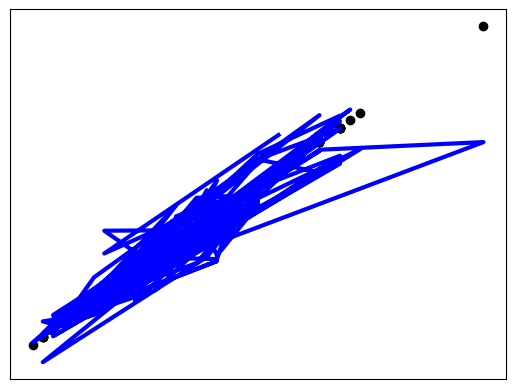

In [53]:
# Plot outputs
plt.scatter(y, y, color="black")
plt.plot(y, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [57]:
huber = HuberRegressor().fit(X, Y)
huber.score(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9003350251839539